In [1]:
from simulation import solve_simulation
from opt_initial_values import inital_values_gauss
from opt_diags_gen import diags_gen_backwards_euler, diags_gen_forward_euler, diags_gen_crank_nicholson
from analytical import analytical_function, t_good_approx


import matplotlib.pyplot as plt
# nicer looking default plots (according to your github)
plt.style.use('bmh')

import config as c
import plots as pl

In [2]:
# good approximation until
print(f"Time for which the analytical solution is a good approximation in s: {t_good_approx():.4f}")
print("analyticly calcualted 1/(3²*2³)=1/72")

print(f"This equals {t_good_approx()/c.delta_t:.2f} steps with our choice of delta t.")

Time for which the analytical solution is a good approximation in s: 0.0139
analyticly calcualted 1/(3²*2³)=1/72
This equals 138.89 steps with our choice of delta t.


/home/leo/Documents/Uni/24WS/comp_phy/Exam/exam_code/problem_3/question_3_5/simulation.py:55: RuntimeWarning: invalid value encountered in scalar multiply
  d_[i] = (d[i] - a[i-1]*d_[i-1])/q


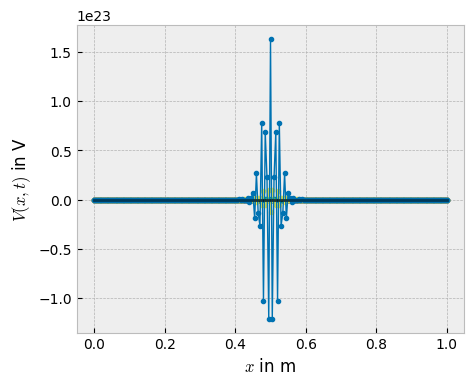

In [3]:
# forward euler
U_fe = solve_simulation(inital_values_gauss,diags_gen_forward_euler)
pl.plot_diff_times(
    U_fe,
    t_diff_times=list(range(15,25)),
    log=False,
    func_t=analytical_function
    )


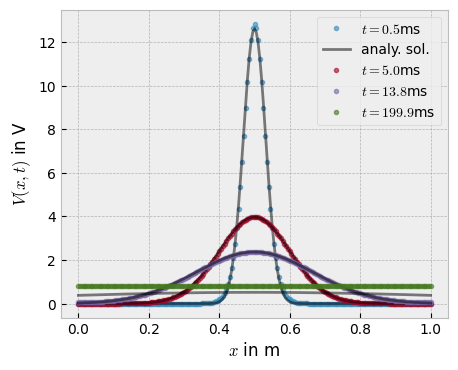

0.013888888888888888
138.88888888888889


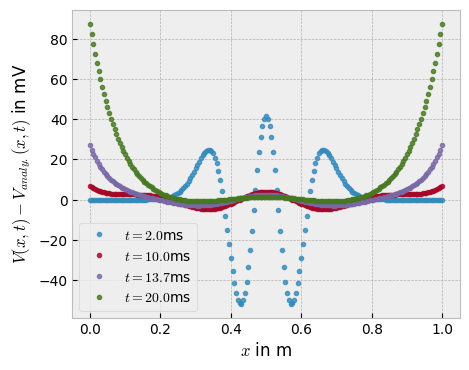

In [4]:
# forward euler
U_be = solve_simulation(inital_values_gauss,diags_gen_backwards_euler)

diff_times  = [5,50,138,c.n_t-1]
filename = "cable_analy_euler_implicit"

pl.plot_diff_times(
    U_be,
    t_diff_times=diff_times,
    log=False,
    alpha=0.6,
    legend=True,
    filename=filename,
    func_t=analytical_function,
    ls = "",
    )

filename = "cable_analy_diff_euler_implicit"
print(t_good_approx())
print(t_good_approx()/c.delta_t)
diff_times  = [20,100,137,200]


pl.plot_diff_times(
    U_be,
    t_diff_times=diff_times,
    log=False,
    alpha=0.8,
    legend=True,
    filename=filename,
    func_t=analytical_function,
    ls = "",
    differential=True,
    )


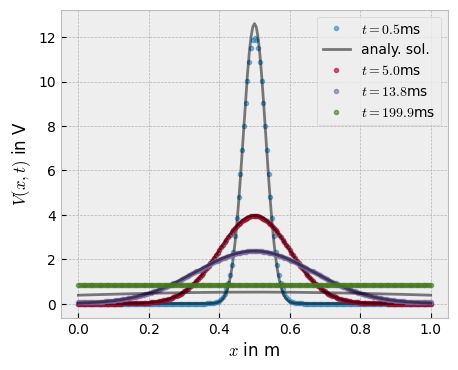

0.013888888888888888
138.88888888888889


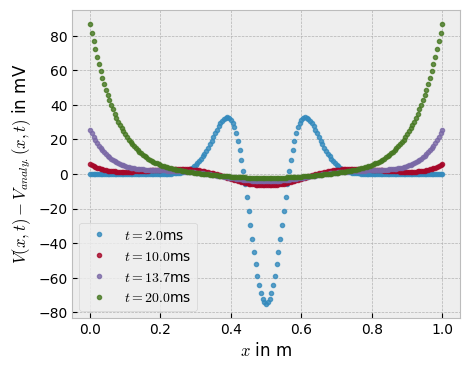

In [5]:
# crank nicholson
U_cn = solve_simulation(inital_values_gauss,diags_gen_crank_nicholson)
diff_times  = [5,50,138,c.n_t-1]
filename = "cable_analy_crank_nicholson"

pl.plot_diff_times(
    U_cn,
    t_diff_times=diff_times,
    log=False,
    alpha=0.6,
    legend=True,
    filename=filename,
    func_t=analytical_function,
    ls = "",
    )

print(t_good_approx())
print(t_good_approx()/c.delta_t)
diff_times  = [20,100,137,200]      
filename = "cable_analy_diff_crank_nicholson"

pl.plot_diff_times(
    U_cn,
    t_diff_times=diff_times,
    log=False,
    alpha=0.8,
    legend=True,
    filename=filename,
    func_t=analytical_function,
    ls = "",
    differential=True,
    )